# Neural Networks

### Acknowledgments  
Taken from [Your First Deep Learning Project in Python with Keras Step-By-Step](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/).

### Stack
Keras -- TensorFlow
> **Note**
> If you run this locally, you will have to setup up TensorFlow. You can follow [this tutorial](https://machinelearningmastery.com/setup-python-environment-machine-learning-deep-learning-anaconda/) to do it.

## 1. Load Data

We are going to use the **Pima Indians onset of diabetes** dataset. This is a standard machine learning dataset from the UCI Machine Learning repository. It describes patient medical record data for Pima Indians and whether they had an onset of diabetes within five years.

Input Variables (X):

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)

Output Variables (y):

1. Class variable (0 or 1)

In [4]:
import pandas as pd
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [5]:
# load the dataset
dataset = loadtxt('diabetes1.csv', delimiter=',', skiprows=1)

# split into 
# - input (X) {first 8 columns}
# - output (y) {last column}
X = dataset[:,0:8]
y = dataset[:,8]

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## 2. Define Keras Model

We will use a `Sequetial()` model to get the most flexibility in defining our network layers.

>**Note**  
The first layer must have an input of size 8 (a.k.a. 8 input dimensions) since we have 8 input variables.

We will have 3 fully-connected (a.k.a. `Dense()`) layers.  

![Neural Network Architecture](https://www.upgrad.com/blog/wp-content/uploads/2020/05/1_3fA77_mLNiJTSgZFhYnU0Q.png)

For the first two, we will use the `ReLU` activation function (better performance).  
For the last layer, we will use `sigmoid` to ensure we have output between 0 and 1 (probability of class 1, so we can use a default threshold of 0.5 to decide which class is predicted).

![sigmoid vs. ReLU](https://miro.medium.com/max/1400/1*XxxiA0jJvPrHEJHD4z893g.png)

In [7]:
# define a sequetial model
model = Sequential()
# first hidden layer has 12 nodes and uses ReLU for activation
# it receiving the raw features as inpute, so input dimensions 
# must be specified at 8
model.add(Dense(12, input_dim=8, activation='relu'))
# second hidden layer has 8 nodes and uses ReLU for activation
model.add(Dense(8, activation='relu'))
# ouput layer has one node and uses sigmoid for activation
model.add(Dense(1, activation='sigmoid'))

## 3. Compile Keras Model

Compiling uses the efficient back-end algorithms in the back-end (in this case TensorFlow) and the most efficient hardware available (CPU, GPU, combination of both).  

We must specify:
1. the **loss function**: used to evaluate a set of weights
2. the **optimizer**: used to search through different weights for the network
3. any optional **metrics** we would like to collect and report during training.

We will choose:
1. loss function: **binary_crossentropy** ([learn more](https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/))
2. optimizer: **adam** ([learn more](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/))
3. metric(s): **accuracy**

In [8]:
# compile the model with:
# - loss: binary cross-entropy
# - optimizer: adam
# - metrics: accuracy
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

## 4. Fit Keras Model
We train our model using the `fit()` function.

Training occurs over epochs and each epoch is split into batches.

* **Epoch**: One pass through all of the rows in the training dataset.
* **Batch**: One or more samples considered by the model within an epoch before weights are updated.

One epoch is comprised of one or more batches, based on the chosen batch size and the model is fit for many epochs. You can [click here](https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/) to learn more.

We wanna train the model enough (3 epochs) to have an acceptable error.

> **Note**  
> This is the most mathematically intesive part that wold need a GPU. This is a relatively simple example though so we do not need one.

In [9]:
# fit the model on the dataset
# - # epochs: 150
# - batch size: 10
num_epochs = 150
fitted_model = model.fit(X_train, 
                         y_train, 
                         epochs=num_epochs, 
                         batch_size=10,
                         verbose=0)

# note: can set verbose=0 to eliminate output

In [10]:
h = fitted_model.history

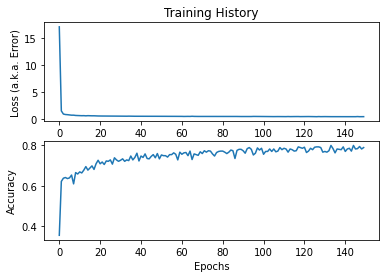

In [11]:
# plot loss and accuracy

import matplotlib.pyplot as plt

plt.figure()

plt.subplot(2,1,1)
plt.plot(fitted_model.epoch, fitted_model.history['loss'])
plt.ylabel('Loss (a.k.a. Error)')
plt.title('Training History')

plt.subplot(2,1,2)
plt.plot(fitted_model.epoch, fitted_model.history['accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')


plt.show()

## 5. Evaluate Keras Model

In [12]:
# evaluate model on training data (returns loss and accuracy)
_, accuracy = model.evaluate(X_train, y_train)

# print accuracy
print('Accuracy: %.2f' % (accuracy*100))

18/18 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.7760
Accuracy: 77.60


When predicting, we must keep in mind that the output we get is not a class label, but rather the probability that the class is `1` (a.k.a. patient has diabetes). This probability is between between 0 and 1.

So, the easiest thing to do is to set a threshold (e.g. 0.5). If the probability is above this threshold, then we predict class 1; otherwise, we predict class 0.

In [13]:
# evaluate model on training data (returns loss and accuracy)
y_pred = (model.predict(X_test) > 0.5).astype(int)

from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

6/6 [==============================] - 0s 2ms/step
Accuracy: 0.71


## 6. Print Model Summary/Architecture

Good practice because it allows us to:
1. Confirm layer order
2. Confirm the output shape of each layer
3. Confirm parameters

In [14]:
# print to console
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                108       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________
None


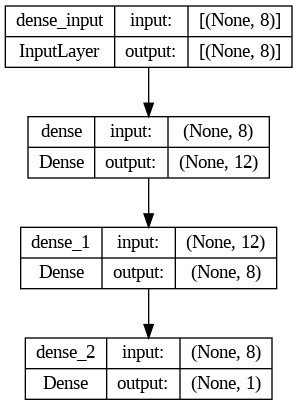

In [15]:
from keras.utils.vis_utils import plot_model

# save model to PNG file
plot_model(model, 
           to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)